# Plot score distribution for single kinase

## Setup

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from katlas.core import *
from katlas.plot import *
import seaborn as sns
from tqdm import tqdm
import numpy as np

tqdm.pandas()

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

## Substrate scoring

In [ ]:
# you can also directly load through Data
comb= Data.get_combine_site_psp_ochoa()

In [ ]:
comb['acceptor'] = comb.site_seq.str[7]

In [ ]:
results = predict_kinase_df(comb,'site_seq',**param_CDDM_upper)

df = pd.concat([comb,results],axis=1)

In [ ]:
palette = get_color_dict(['S','T','Y'],'tab20')

hist_params = {'element':'poly',
              'edgecolor': None,
              'alpha':0.5,
              'bins':100,
              'kde':True,
              'palette':palette}

In [ ]:
def plot_hist(df,kinase):
    plt.figure(figsize=(6,2))
    sns.histplot(data=df,x=kinase,hue=df.acceptor,**hist_params)
    plt.xlabel('')
    plt.title(kinase)

In [ ]:
def get_genes(kinase,s=None,t=None,y=None,export=False):
    df2 = df[['gene','acceptor']].copy()
    df2['gene'] = df2.gene.str.split('|')
    df2[kinase] = results[kinase]
    print(df2.shape)
    df2 = df2.explode('gene')
    print(df2.shape)
    L = []
    if s is not None:
        s = df2.query(f'acceptor == "S" & {kinase}>{s}')['gene'].drop_duplicates()
        L.append(s)
    if t is not None:
        t = df2.query(f'acceptor == "T" & {kinase}>{t}')['gene'].drop_duplicates()
        L.append(t)
    if y is not None:
        y = df2.query(f'acceptor == "Y" & {kinase}>{y}')['gene'].drop_duplicates()
        L.append(y)
        
    sty = pd.concat(L).drop_duplicates().reset_index()
    
    if export:
        print('exporting csv file for st')
        sty.to_csv(f'supp/{kinase}.csv')
        
    return sty


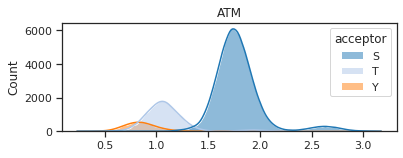

In [ ]:
plot_hist(df,'ATM') # S: 2.3, T: 1.55

In [ ]:
st = get_genes('ATM',s=2.3,t=1.55)

(116887, 3)
(123515, 3)
exporting csv file for st


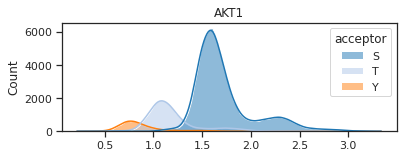

In [ ]:
plot_hist(df,'AKT1') # S: 2.55, T: 1.6

In [ ]:
y = get_genes('AKT1',s=2.55,t=1.6)

(116887, 3)
(123515, 3)
exporting csv file for st


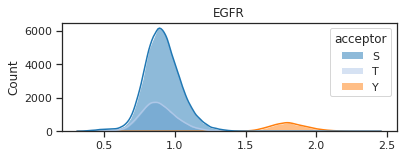

In [ ]:
plot_hist(df,'EGFR') # Y: 2.1

In [ ]:
y = get_genes('EGFR',y=2.0)

(116887, 3)
(123515, 3)
exporting csv file for st


## Others

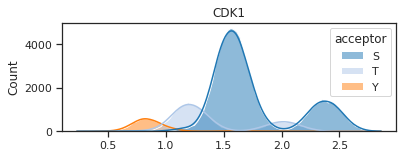

In [ ]:
plot_hist(df,'CDK1')

In [ ]:
y = get_genes('CDK1',s=2.0,t=1.65)

(116887, 3)
(123515, 3)
exporting csv file for st


In [ ]:
y = get_genes('CDK1',s=2.0,t=1.65)

(116887, 3)
(123515, 3)
exporting csv file for st


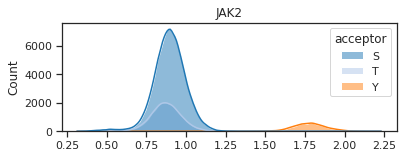

In [ ]:
plot_hist(df,'JAK2')# Y: 2.0

In [ ]:
_ = get_genes('JAK2',y=2.0)

(116887, 3)
(123515, 3)
exporting csv file for st


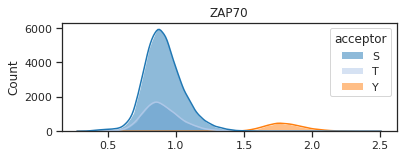

In [ ]:
plot_hist(df,'ZAP70') # Y: 2.1

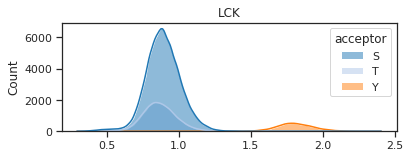

In [ ]:
plot_hist(df,'LCK') # Y: 2.1

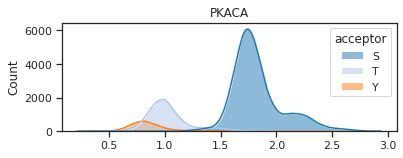

In [ ]:
plot_hist(df,'PKACA') # S: 2.5, T: 1.5